<a href="https://colab.research.google.com/github/BogdanDavidRomanovich/labs/blob/master/SAlab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подключение библиотек

In [1]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
from math import *

# Определение полиномов

In [2]:
# Полином Чебышева первого рода (PCPR)

def PCPR(x, p):
  if p == 0:
    return 1
  elif p == 1:
    return x
  else:
    return 2 * x * PCPR(x, p - 1) - PCPR(x, p - 2)

In [3]:
# Смещенный полином Чебышева (SPCPR)

def SPCPR(x, p):
  if p == 0:
    return 1
  elif p == 1:
    return -1 + 2 * x
  else:
    return 2 * (-1 + 2 * x) * SPCPR(x, p - 1) - SPCPR(x, p - 2)
  

In [4]:
# Полином Чебышева второго рода (PCVR)

def PCVR(x, p):
  if p == 0:
    return 1
  elif p == 1:
    return 2 * x
  else:
    return 2 * x * PCVR(x, p - 1) - PCVR(x, p - 2)

In [5]:
# Смещенный полином Чебышева второго рода (SPCVR)

def SPCVR(x, p):
  if p == 0:
    return 1
  elif p == 1:
    return 4 * x - 2
  else:
    return 2 * (2 * x - 1) * SPCVR(x, p - 1) - SPCVR(x, p - 2)

In [6]:
# Полином Лежандра (LNDR)

def LNDR(x, p):
  if p == 0:
    return 1
  elif p == 1:
    return x
  else:
    return ((2 * p - 1) * x * LNDR(x, p - 1) - (p - 1) * LNDR(x, p - 2)) / p

In [7]:
# Полином Лагерра (LGR)

def LGR(x, p):
  if p == 0:
    return 1
  elif p == 1:
    return 1 - x
  else:
    return (2 * p - 1 - x) * LGR(x, p - 1) - (p - 1) ** 2 *LGR(x, p - 2)

In [8]:
# Полином Эрмита (HERM)

def HERM(x, p):
  if p == 0:
    return 0
  elif p == 1:
    return x
  else:
    return x * HERM(x, p - 1) - (p - 1) * HERM(x, p - 2)

# Ввод данных




In [9]:
# Объявление пустых списков для хранения входных данных

X1 = []
X2 = []
X3 = []
Y = []

In [11]:
# Считывание данных из файлов Х1, Х2, Х3 и Y

X1txt = open("X1.txt","r")
for l in X1txt:
  X1.append([float(x) for x in l.split()])
  
X2txt = open("X2.txt","r")
for l in X2txt:
  X2.append([float(x) for x in l.split()])

X3txt = open("X3.txt","r")
for l in X3txt:
  X3.append([float(x) for x in l.split()])

Ytxt = open("Y.txt", "r")
for l in Ytxt:
  Y.append([float(x) for x in l.split()])

In [12]:
n1 = len(X1[0])  # n1 - размерность X1
n2 = len(X2[0])  # n2 - размерность Х2
n3 = len(X3[0])  # n3 - размерность Х3
n = len(Y)       # n  - объем выборки 
m = len(Y[0])    # m  - размерность Y

In [13]:
# сохранение считанных данных в виде матриц

X1 = np.array(X1)
X2 = np.array(X2)
X3 = np.array(X3)
Y = np.array(Y)

In [14]:
# Создание таблицы входных данных

InpDF = pd.DataFrame({
}, index = np.arange(n) + 1)

for j in range(n1):
  InpDF['X1' + str(j + 1)] = X1[:, j]
  
for j in range(n2):
  InpDF['X2' + str(j + 1)] = X2[:, j]
  
for j in range(n3):
  InpDF['X3' + str(j + 1)] = X3[:, j]
  
for j in range(m):
  InpDF['Y' + str(j + 1)] = Y[:, j]

In [15]:
# Вывод таблицы с входными данными 

#InpDF

# Варианты функций $\varphi_{p_k}(x_{j_k}) $

Вариант 1

In [16]:
#alfa = 2 * n + 1
#def fi1(x, p):
#  return (1 + alfa * SPCPR(x, p)) / (1 + SPCVR(x, 2 * p) + alfa * SPCVR(x, p))

Вариант 2

In [17]:
#fi1 = LGR

In [18]:
fi1 = SPCVR

In [19]:
# Степени полиномов

P1 = 15
P2 = 15
P3 = 15

# Нормирование данных

In [20]:
maxX1 = np.array([max(X1[:, j]) for j in range(n1)])
minX1 = np.array([min(X1[:, j]) for j in range(n1)])
  
maxX2 = np.array([max(X2[:, j]) for j in range(n2)])
minX2 = np.array([min(X2[:, j]) for j in range(n2)])

maxX3 = np.array([max(X3[:, j]) for j in range(n3)])
minX3 = np.array([min(X3[:, j]) for j in range(n3)])

maxY = np.array([max(Y[:, j]) for j in range(m)])
minY = np.array([min(Y[:, j]) for j in range(m)])

for j in range(n1):
  X1[:, j] = (X1[:, j] - minX1[j]) / (maxX1[j] - minX1[j])
  
for j in range(n2):
  X2[:, j] = (X2[:, j] - minX2[j]) / (maxX2[j] - minX2[j])
  
for j in range(n3):
  X3[:, j] = (X3[:, j] - minX3[j]) / (maxX3[j] - minX3[j])
  
for j in range(m):
  Y[:, j] = (Y[:, j] - minY[j]) / (maxY[j] - minY[j])

In [21]:
# Создание таблицы нормированных данных

NormDF = pd.DataFrame({
}, index = np.arange(n) + 1)

for j in range(n1):
  NormDF['X1' + str(j + 1)] = X1[:, j]
  
for j in range(n2):
  NormDF['X2' + str(j + 1)] = X2[:, j]
  
for j in range(n3):
  NormDF['X3' + str(j + 1)] = X3[:, j]
  
for j in range(m):
  NormDF['Y' + str(j + 1)] = Y[:, j]

In [22]:
# Вывод таблицы с нормированными данными

#NormDF

In [23]:
b = np.log(np.sin(Y.copy()) + 1)

In [24]:
# Создаем пустую матрицу L коэффициентов при неизвестных лямбдах

L = np.empty((n, n1 * (P1 + 1) + n2 * (P2 + 1) + n3 * (P3 + 1)))
L.shape     # размерность матрицы L

(45, 112)

In [25]:
# Заполняем L значениями 
for j1 in range(n1):
  for p1 in range(P1 + 1):
    L[:, p1 + j1 * (P1 + 1)] = np.sin(fi1(X1[:, j1], p1))
    
for j2 in range(n2):
  for p2 in range(P2 + 1):
    L[:, p2 + j2 * (P2 + 1) + n1 * (P1 + 1)] = np.sin(fi1(X2[:, j2], p2))
    
for j3 in range(n3):
  for p3 in range(P3 + 1):
    L[:, p3 + j3 * (P3 + 1) + n1 * (P1 + 1) + n2 * (P2 + 1)] = np.sin(fi1(X3[:, j3], p3))

# Находим $\lambda_1, \lambda_2, \lambda_3$

In [26]:
Lambda = np.linalg.lstsq(L[:,:], b)[0].transpose()
Lambda.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(4, 112)

In [27]:
Lambda1 = np.empty((m, n1, P1 + 1))
Lambda2 = np.empty((m, n2, P2 + 1))
Lambda3 = np.empty((m, n3, P3 + 1))

In [28]:
for i in range(m):
  for j1 in range(n1):
    for p1 in range(P1 + 1):
      Lambda1[i, j1, p1] = Lambda[i, p1 + j1 * (P1 + 1)]
      
for i in range(m):
  for j2 in range(n2):
    for p2 in range(P2 + 1):
      Lambda2[i, j2, p2] = Lambda[i, n1 * (P1 + 1) + p2 + j2 * (P2 + 1)]
      
      
for i in range(m):
  for j3 in range(n3):
    for p3 in range(P3 + 1):
      Lambda3[i, j3, p3] = Lambda[i, n1 * (P1 + 1) + n2 * (P2 + 1) + p3 + j3 * (P3 + 1)]

In [29]:
Lambda3.shape

(4, 3, 16)

In [30]:
Psi1 = np.zeros((m, n, n1))
Psi2 = np.zeros((m, n, n2))
Psi3 = np.zeros((m, n, n3))

In [31]:
for i in range(m):
  for j1 in range(n1):
    for q in range(n):
      for p1 in range(P1 + 1):
        Psi1[i, q, j1] += Lambda1[i, j1, p1] * sin(fi1(X1[q, j1], p1))
      Psi1[i, q, j1] = np.exp(Psi1[i, q, j1]) - 1

      
for i in range(m):
  for j2 in range(n2):
    for q in range(n):
      for p2 in range(P2 + 1):
        Psi2[i, q, j2] += Lambda2[i, j2, p2] * sin(fi1(X2[q, j2], p2))  
      Psi2[i, q, j2] = np.exp(Psi2[i, q, j2]) - 1
    
for i in range(m):
  for j3 in range(n3):
    for q in range(n):
      for p3 in range(P3 + 1):
        Psi3[i, q, j3] += Lambda3[i, j3, p3] * sin(fi1(X3[q, j3], p3))
      Psi3[i, q, j3] = np.exp(Psi3[i, q, j3]) - 1
      

In [32]:
A1 = np.empty((m, n1))
A2 = np.empty((m, n2))
A3 = np.empty((m, n3))

# Находим $A_1, A_2 , A_3$

In [33]:
for i in range(m):
  A1[i] = np.linalg.lstsq(np.sin(Psi1[i]), b[:, i])[0]
  A2[i] = np.linalg.lstsq(np.sin(Psi2[i]), b[:, i])[0]
  A3[i] = np.linalg.lstsq(np.sin(Psi3[i]), b[:, i])[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the 

In [34]:
Fi1 = np.empty((m, n))
Fi2 = np.empty((m, n))
Fi3 = np.empty((m, n))

In [35]:
for i in range(m):
  Fi1[i] = np.exp(np.sin(Psi1[i]) @ A1[i]) - 1
  Fi2[i] = np.exp(np.sin(Psi2[i]) @ A2[i]) - 1
  Fi3[i] = np.exp(np.sin(Psi3[i]) @ A3[i]) - 1

In [36]:
F = np.empty((m, n, 3))

In [37]:
Fi3

array([[ 0.28797707,  0.23097577, -0.00493551, -0.12644092, -0.09906602,
        -0.02322158,  0.11726781, -0.11632667,  0.21324302,  0.26469204,
         0.09225255,  0.20552521,  0.28327051,  0.17169836,  0.27472719,
         0.10257184, -0.0249901 ,  0.02846515,  0.04338287, -0.02883277,
         0.01341165,  0.19543833,  0.27103952,  0.31200152,  0.85100369,
         0.73514791,  0.51577144,  0.18758603,  0.20406622,  0.86425974,
         0.74354155,  0.54751104,  0.18573169,  0.11421659,  0.26906215,
         0.29019582,  0.14884902, -0.04013951, -0.05293472, -0.13275826,
        -0.18881399, -0.08533661,  0.18436327, -0.03038225,  0.10628724],
       [ 0.15403787, -0.04717855, -0.02062269,  0.07802418,  0.04000274,
         0.07156527,  0.10152714,  0.10128525,  0.00233502,  0.07648677,
         0.16079303,  0.31030466,  0.28069392,  0.31578542,  0.53453894,
         0.39647596,  0.20910685,  0.05517511,  0.14255664, -0.09159279,
         0.0549269 ,  0.3144341 ,  0.77751878,  0.

In [38]:
for i in range(m):
  F[i] = np.array([np.sin(Fi1[i]), np.sin(Fi2[i]), np.sin(Fi3[i])]).transpose()

In [39]:
C = np.empty((m, 3))

# Находим $C_1, C_2, C_3$

In [40]:
for i in range(m):
  C[i] = np.linalg.lstsq(np.sin(F[i]), b[:, i])[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [41]:
Ya = np.arcsin(np.array([np.exp(np.sin(F[i]) @ C[i]) - 1 for i in range(m)]))
for i in range(m):
  Ya[i] = Ya[i] * (maxY[i] - minY[i]) + minY[i] 

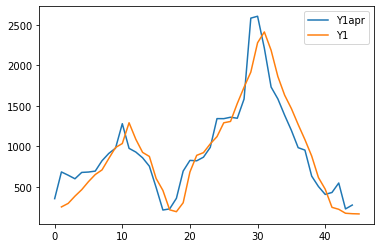

In [42]:
plt.plot(Ya[0], label = 'Y1apr')
plt.plot(InpDF['Y1'], label = 'Y1')
plt.legend()
plt.show()

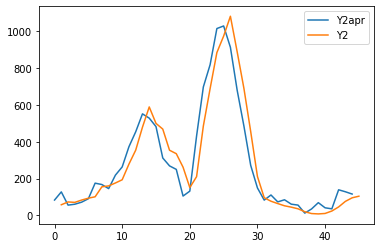

In [43]:
plt.plot(Ya[1], label = 'Y2apr')
plt.plot(InpDF['Y2'], label = 'Y2')
plt.legend()
plt.show()

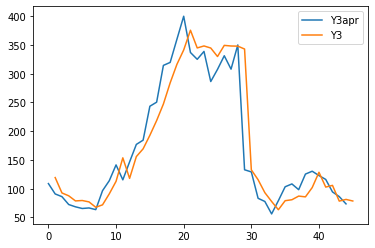

In [44]:
plt.plot(Ya[2], label = 'Y3apr')
plt.plot(InpDF['Y3'], label = 'Y3')
plt.legend()
plt.show()

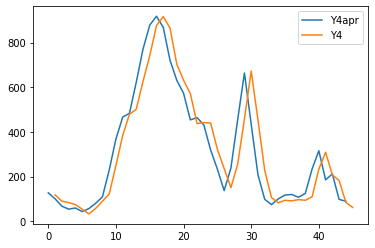

In [45]:
plt.plot(Ya[3], label = 'Y4apr')
plt.plot(InpDF['Y4'], label = 'Y4')
plt.legend()
plt.show()